In [1]:
import networkx as nx
import random

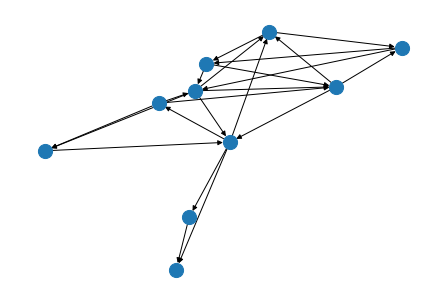

In [31]:
#====================Setup variable =================================
num_node = 10
p = 0.5
lenfrom = 1
lenend = 10
negative = False
wantdraw = True
#====================================================================
G = nx.random_geometric_graph(num_node,p)
D = nx.DiGraph()
p = 0.5
D.add_nodes_from(G.nodes)
for u,v in G.edges():
    w = random.randint(-lenend,-lenfrom) if random.random() < 0.5 and negative == True else random.randint(lenfrom,lenend)
    if random.random()<p:
        D.add_weighted_edges_from([(u,v,w)])
    else:
        D.add_weighted_edges_from([(v,u,w)])
nx.draw(D,node_size=200,with_labels=False) if wantdraw == True else 0
G =D

In [32]:
graph = []
for node in G.nodes:
    graph += list(G.out_edges(node))
    graph += list(G.in_edges(node))
graph
graph = list(dict.fromkeys(graph)) # remove duplicate edge

In [33]:
dict_weight = nx.get_edge_attributes(G, "weight")
final = []
for edge in graph:
    final.append(edge + tuple([dict_weight[edge]]))

In [34]:
#write to file
f = open("data_generate.txt","w")
for edge in final:
    f.write(str(edge[0]) + "->" + str(edge[1]) + "=" + str(edge[2]))
    f.write("\n")
f.close()